In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
import keras

from matplotlib import pyplot
# Define column name of the label vector

# Transform the labels from String to Integer via LabelEncoder

# Add a new column to the existing DataFrame with the encoded values


In [ ]:
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()


def red_data_1(file_name,le):
  data = pd.read_csv(file_name)
  print("File name is *******> " + file_name)
  print(data["Activity"].unique())
  print()
  #data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Lying"}, 'sed')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Sitting",'Standing',"Walking"])]
  print("**after filtering data**")
  print(data["Activity"].unique())
  print()
  data[LABEL] = le.fit_transform(data['Activity'].values.ravel())
  return data


In [ ]:
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()


def red_data_2(file_name,le):
  data = pd.read_csv(file_name)
  print("File name is *******> " + file_name)
  print(data["Activity"].unique())
  print()
  data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Sitting",'Standing',"Walking"])]
  print("**after filtering data**")
  print(data["Activity"].unique())
  print()
  data[LABEL] = le.fit_transform(data['Activity'].values.ravel())
  return data


In [3]:
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()


def red_data_3(file_name,le):
  data = pd.read_csv(file_name)
  print("File name is *******> " + file_name)
  print(data["Activity"].unique())
  print()
  data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Lying","Sitting",'Standing',"Walking"])]
  print("**after filtering data**")
  print(data["Activity"].unique())
  print()
  data[LABEL] = le.fit_transform(data['Activity'].values.ravel())
  return data


In [4]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['Time'], data['X'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['Y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['Z'], 'Z-Axis')
    plot_axis(ax3, data['Time'], data['Angle'], 'Angle')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(True)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)


from scipy import stats
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 10
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['X'].values[i: i + time_steps]
        ys = df['Y'].values[i: i + time_steps]
        zs = df['Z'].values[i: i + time_steps]
        angle = df['Angle'].values[i: i + time_steps]
        u5 = df['Unnamed: 5'].values[i: i + time_steps]
        u6= df['Unnamed: 6'].values[i: i + time_steps]
        u7= df['Unnamed: 7'].values[i: i + time_steps]
        u8= df['Unnamed: 8'].values[i: i + time_steps]
        u9= df['Unnamed: 9'].values[i: i + time_steps]
        u10= df['Unnamed: 10'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs, ys, zs,angle,u5,u6,u7,u8,u9,u10 ])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels


In [5]:
def Trans(df_train):
  pd.options.mode.chained_assignment = None  # default='warn'
  df_train['X'] = df_train['X'] / df_train['X'].max()
  df_train['Z'] = df_train['Z'] / df_train['Z'].max()
  df_train['Y'] = df_train['Y']/ df_train['Y'].max()
  df_train['Angle'] = df_train['Angle']/ df_train['Angle'].max()
  df_train['Unnamed: 5'] = df_train['Unnamed: 5']/ df_train['Unnamed: 5'].max()
  df_train['Unnamed: 6'] = df_train['Unnamed: 6']/ df_train['Unnamed: 6'].max()
  df_train['Unnamed: 7'] = df_train['Unnamed: 7']/ df_train['Unnamed: 7'].max()
  df_train['Unnamed: 8'] = df_train['Unnamed: 8']/ df_train['Unnamed: 8'].max()
  df_train['Unnamed: 9'] = df_train['Unnamed: 9']/ df_train['Unnamed: 9'].max()
  df_train['Unnamed: 10'] = df_train['Unnamed: 10']/ df_train['Unnamed: 10'].max()
  # Round numbers
  return df_train

In [6]:
# reading data
red_data = red_data_3
df1 = red_data("DF2.csv", le)
df1 = Trans(df1)

df2 = red_data("DF3.csv", le)
df2 = Trans(df2)

df3 = red_data("DF4.csv", le)
df3 = Trans(df3)

df4 = red_data("DF5.csv", le)
df4 = Trans(df4)

df5 = red_data("01.csv", le)
df5 = Trans(df5)

df6 = red_data("02.csv", le)
df6 = Trans(df6)

df7 = red_data("03.csv", le)


File name is *******> DF2.csv
['Sitting' 'switch' 'Switch' 'Reclining' 'Standing' 'discard' 'Walking'
 'Lying' 'half squats' 'calf raises' 'leg kick backs' 'half squat'
 'Discard']

**after filtering data**
['Sitting' 'Standing' 'Walking' 'Lying']

File name is *******> DF3.csv
['Sitting' 'Switch' 'Reclining' 'Standing' 'discard' 'switch' 'Walking'
 'Lying' 'half squats' 'calf raises' 'leg kick backs' 'half squat' nan
 'single leg straight leg kick backs' 'Discard']

**after filtering data**
['Sitting' 'Standing' 'Walking' 'Lying']

File name is *******> DF4.csv
['discard' 'Sitting' 'Switch' 'Reclining' 'Standing' 'Walking' 'Lying'
 'Discard' 'half squats' 'calf raises' 'leg kick backs' 'half squat']

**after filtering data**
['Sitting' 'Standing' 'Walking' 'Lying']

File name is *******> DF5.csv
['Preparation (discard)' 'Sitting' 'Switch' 'Standing' 'Standing '
 'Walking' 'Lying' 'Discard' 'discard' 'half squats' 'calf raises'
 'leg kick backs']

**after filtering data**
['Sitting' 'S

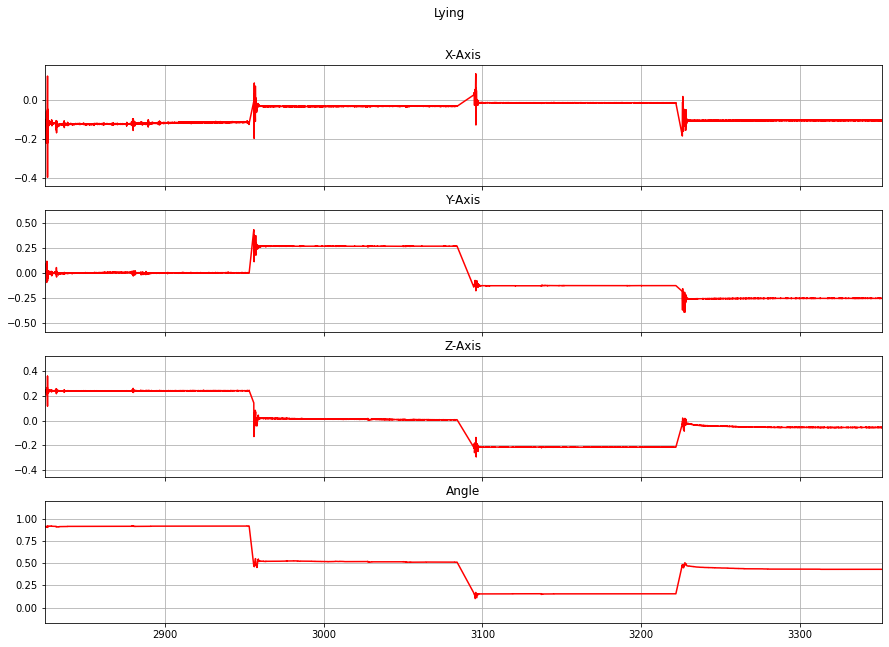

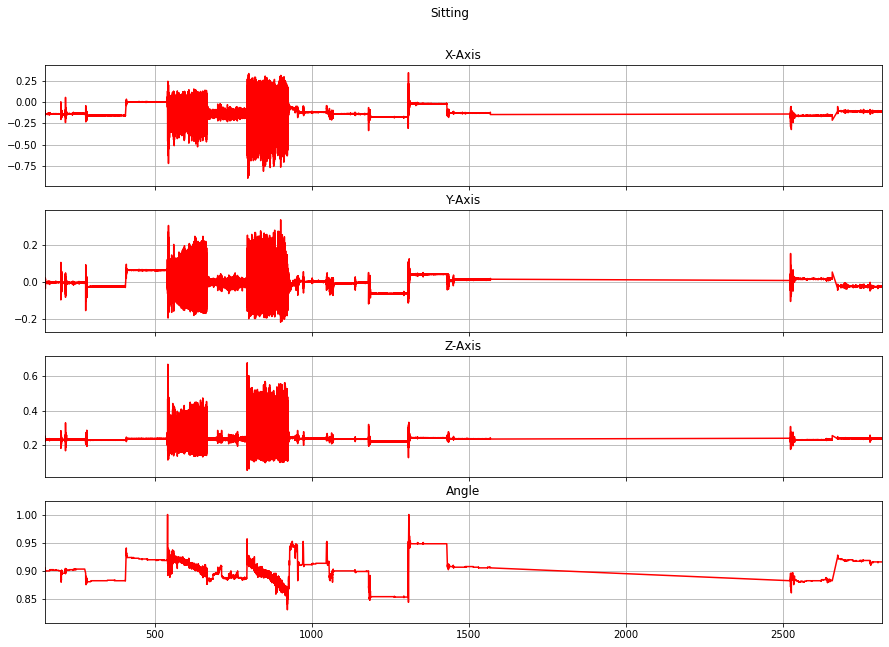

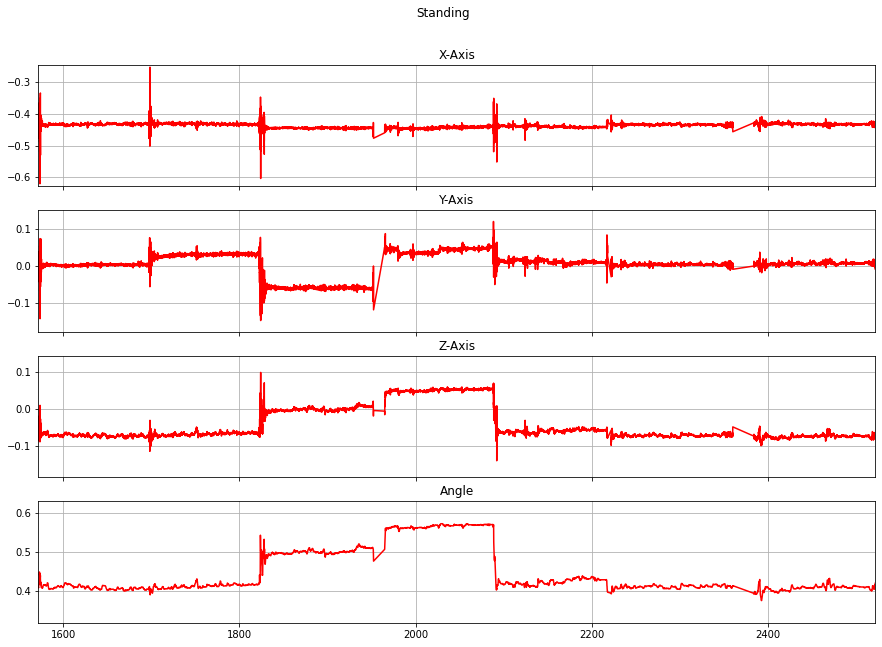

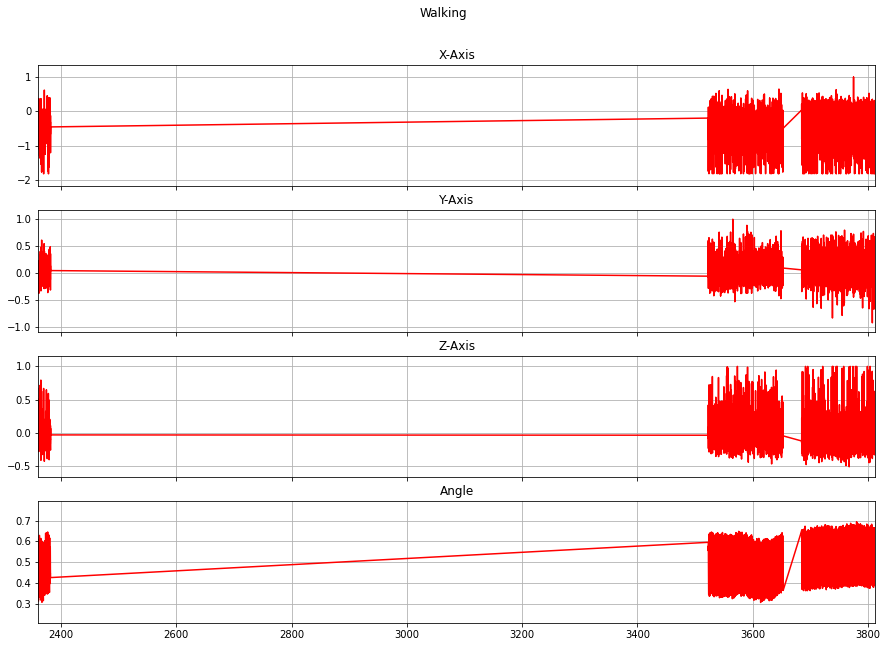

In [7]:
# Plot data

a = df1
for activity in np.unique(a['Activity']):
    subset = a[a['Activity'] == activity]
    plot_activity(activity, subset)


In [9]:
%%time
frames = [df1, df2, df3,df4,df5,df6]
result = pd.concat(frames)

#result=result.reset_index()

# The number of steps within one time segment
TIME_PERIODS = 35
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1

x_train, y_train = create_segments_and_labels(result,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_val, y_val = create_segments_and_labels(df7,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

CPU times: user 2min 41s, sys: 5.18 s, total: 2min 46s
Wall time: 2min 41s


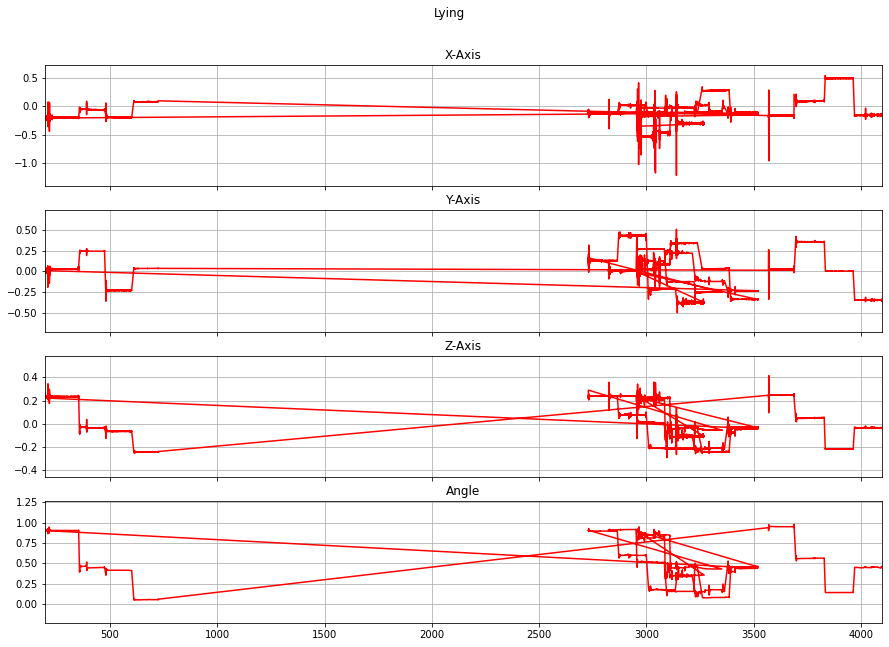

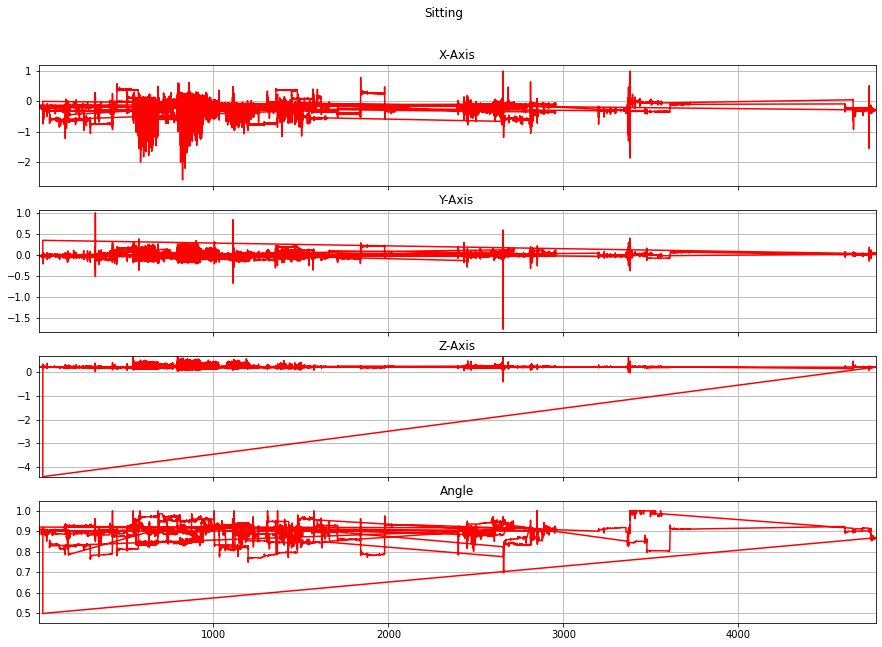

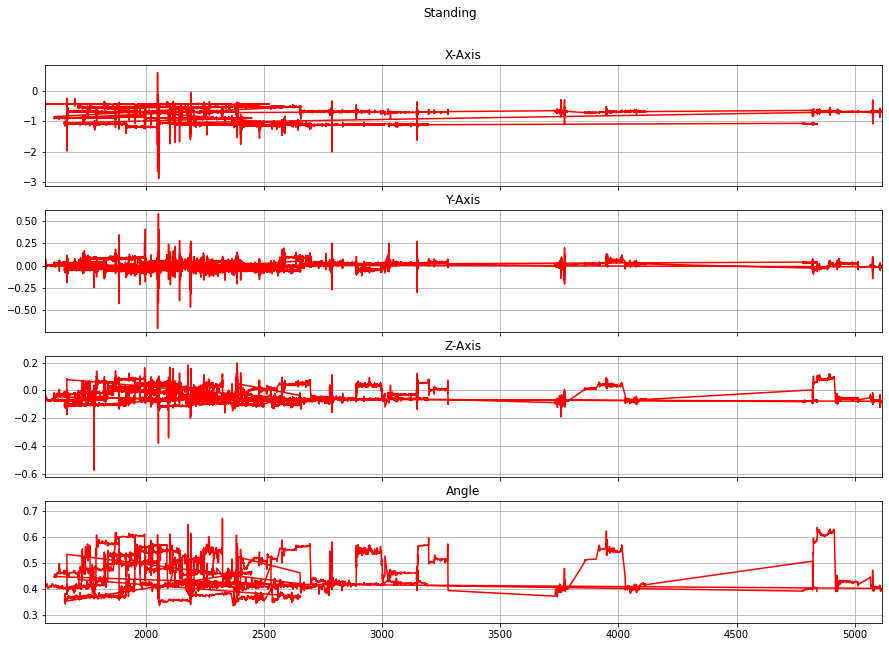

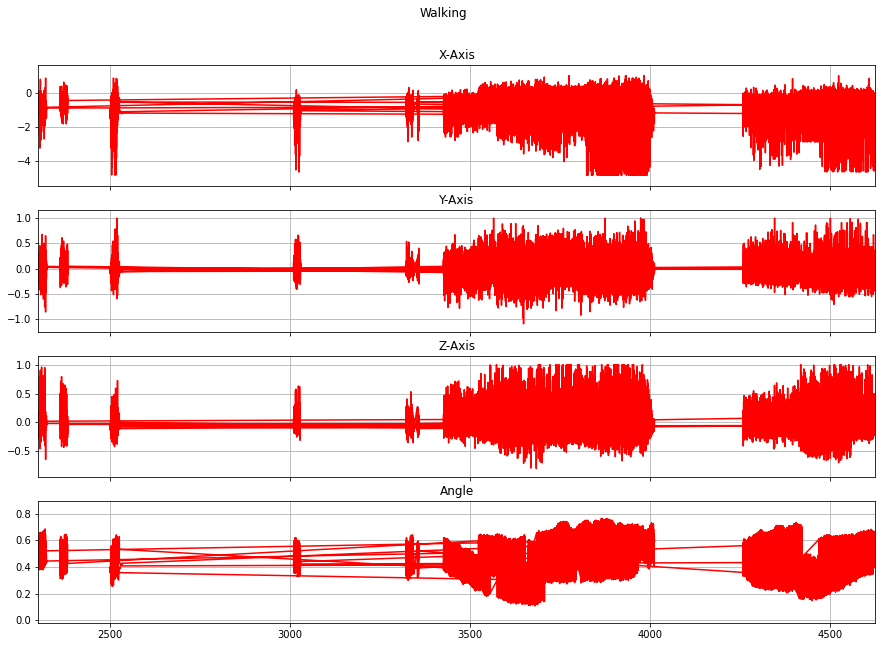

In [10]:
a = result
for activity in np.unique(a['Activity']):
    subset = a[a['Activity'] == activity]
    plot_activity(activity, subset)

In [11]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

# Set input & output dimensions
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

x_train shape:  (617494, 35, 10)
617494 training samples
y_train shape:  (617494,)
['Lying', 'Sitting', 'Standing', 'Walking']
x_train shape: (617494, 350)
input_shape: 350


In [12]:
y_train_hot = np_utils.to_categorical(y_train, 4)
print('New y_train shape: ', y_train_hot.shape)

y_val_hot = np_utils.to_categorical(y_val, 4)
print('New y_train shape: ', y_val_hot.shape)

New y_train shape:  (617494, 4)
New y_train shape:  (121393, 4)


In [14]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network

model_m.add(Reshape((TIME_PERIODS, 10), input_shape=(input_shape,)))

model_m.add(Dense(1024, activation='relu'))
model_m.add(Dense(512, activation='relu'))
model_m.add(Dense(100, activation='relu'))

model_m.add(Flatten())
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

opt = keras.optimizers.Adam(learning_rate= 0.0001) 
model_m.compile(loss='categorical_crossentropy',
                optimizer=opt, metrics=['accuracy'])
# Hyper-parameters
BATCH_SIZE = 128
EPOCHS = 50

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_data = (x_val, y_val_hot))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 35, 10)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 35, 1024)          11264     
_________________________________________________________________
dense_5 (Dense)              (None, 35, 512)           524800    
_________________________________________________________________
dense_6 (Dense)              (None, 35, 100)           51300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 14004     
Total params: 601,368
Trainable params: 601,368
Non-trainable params: 0
________________________________________________

KeyboardInterrupt: ignored

In [25]:
df1[df1.ActivityEncoded == 1]

,Time,Angle,X,Y,Z,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Activity,ActivityEncoded
0,150.00,0.904278,-0.118871,-0.011326,0.226157,0.035304,0.009499,-0.032211,-0.491453,-0.023485,0.719626,Sitting,1
1,150.03,0.903167,-0.137835,0.012431,0.237035,0.029034,0.013692,-0.011551,-0.491453,-0.027453,0.704050,Sitting,1
2,150.05,0.903167,-0.142923,0.023204,0.244118,-0.005291,0.009722,0.000000,-0.491453,-0.016086,0.710280,Sitting,1
3,150.11,0.902111,-0.122572,-0.011326,0.229193,-0.011538,0.017848,-0.021452,-0.491453,-0.016086,0.710280,Sitting,1
4,150.12,0.901000,-0.127660,-0.013536,0.236782,0.008893,0.019481,0.008251,-0.491453,-0.023485,0.700187,Sitting,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71143,2815.50,0.915889,-0.111008,-0.023481,0.240071,0.000422,0.000705,0.000000,0.374017,-0.073780,0.984424,Sitting,1
71144,2815.60,0.915889,-0.111008,-0.024309,0.240324,0.000422,0.000223,-0.000396,0.385641,-0.073780,0.989159,Sitting,1
71145,2815.60,0.915889,-0.109621,-0.024033,0.239818,0.000556,0.000000,0.000396,0.374017,-0.073780,0.984424,Sitting,1
71146,2815.60,0.915889,-0.109621,-0.023757,0.239312,0.000267,0.000000,-0.000396,0.374017,-0.073780,0.984424,Sitting,1


9.csv
9.csv


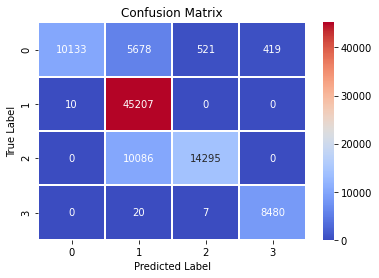

***************************   9.csv   ***************************
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     16751
           1       0.74      1.00      0.85     45217
           2       0.96      0.59      0.73     24381
           3       0.95      1.00      0.97      8507

    accuracy                           0.82     94856
   macro avg       0.91      0.80      0.83     94856
weighted avg       0.86      0.82      0.81     94856

15.csv
15.csv


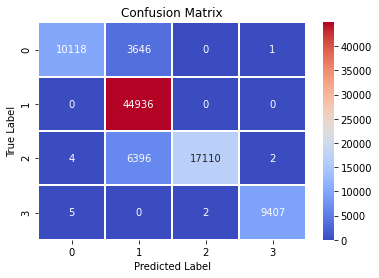

***************************   15.csv   ***************************
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     13765
           1       0.82      1.00      0.90     44936
           2       1.00      0.73      0.84     23512
           3       1.00      1.00      1.00      9414

    accuracy                           0.89     91627
   macro avg       0.95      0.87      0.90     91627
weighted avg       0.91      0.89      0.89     91627

13.csv
13.csv


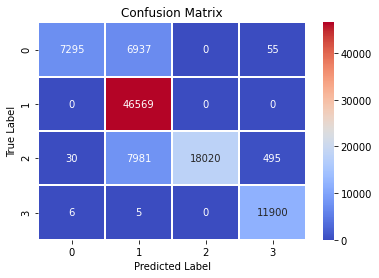

***************************   13.csv   ***************************
              precision    recall  f1-score   support

           0       1.00      0.51      0.67     14287
           1       0.76      1.00      0.86     46569
           2       1.00      0.68      0.81     26526
           3       0.96      1.00      0.98     11911

    accuracy                           0.84     99293
   macro avg       0.93      0.80      0.83     99293
weighted avg       0.88      0.84      0.83     99293

11.csv
11.csv


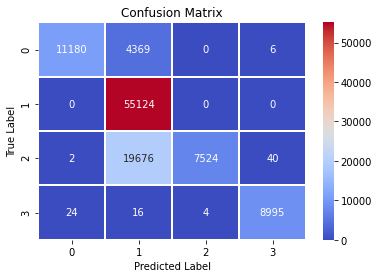

***************************   11.csv   ***************************
              precision    recall  f1-score   support

           0       1.00      0.72      0.84     15555
           1       0.70      1.00      0.82     55124
           2       1.00      0.28      0.43     27242
           3       0.99      1.00      1.00      9039

    accuracy                           0.77    106960
   macro avg       0.92      0.75      0.77    106960
weighted avg       0.84      0.77      0.74    106960

10.csv
10.csv


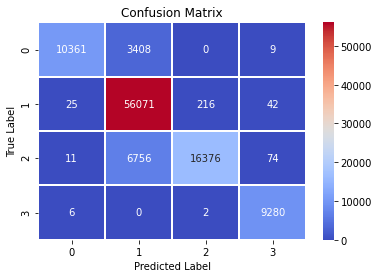

***************************   10.csv   ***************************
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     13778
           1       0.85      0.99      0.91     56354
           2       0.99      0.71      0.82     23217
           3       0.99      1.00      0.99      9288

    accuracy                           0.90    102637
   macro avg       0.95      0.86      0.90    102637
weighted avg       0.91      0.90      0.89    102637

06.csv
06.csv


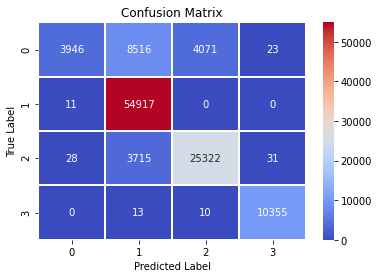

***************************   06.csv   ***************************
              precision    recall  f1-score   support

           0       0.99      0.24      0.38     16556
           1       0.82      1.00      0.90     54928
           2       0.86      0.87      0.87     29096
           3       0.99      1.00      1.00     10378

    accuracy                           0.85    110958
   macro avg       0.92      0.78      0.79    110958
weighted avg       0.87      0.85      0.82    110958

05.csv
05.csv


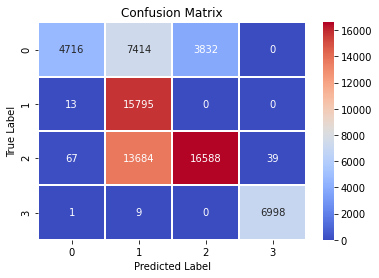

***************************   05.csv   ***************************
              precision    recall  f1-score   support

           0       0.98      0.30      0.45     15962
           1       0.43      1.00      0.60     15808
           2       0.81      0.55      0.65     30378
           3       0.99      1.00      1.00      7008

    accuracy                           0.64     69156
   macro avg       0.80      0.71      0.68     69156
weighted avg       0.78      0.64      0.63     69156



In [16]:
# Test datasets

import seaborn as sns
#frames = [pd.read_csv("02.csv"), pd.read_csv("10.csv"), pd.read_csv("11.csv")]
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

test_datasets = ["9.csv","15.csv","13.csv","11.csv","10.csv","06.csv","05.csv"]


for i in test_datasets:
  data= pd.read_csv(i)
  data = data.dropna()
  print(i)
  data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Lying"}, 'sed')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Lying","Sitting",'Standing',"Walking"])]

 
  #data = data.loc[data['Activity'].isin(['Lying','Sitting','Standing',"Walking"])]

  print(i)
 
  data["ActivityEncoded"] = le.fit_transform(data['Activity'].values.ravel())
  df_test = data

  x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


  y_pred_test = model_m.predict(x_test)
  # Take the class with the highest probability from the test predictions
  max_y_pred_test = np.argmax(y_pred_test, axis=1)


  show_confusion_matrix(y_test, max_y_pred_test)
  print("***************************   " + i + "   ***************************" )
  print(classification_report(y_test, max_y_pred_test))

In [19]:

def Test_data_process(i):
  data= pd.read_csv(i)
  data = data.dropna()
  print(i)
  data = data.replace({'Activity': "Reclining"}, 'Sitting')
  #data = data.replace({'Activity': "Lying"}, 'sed')
  #data = data.replace({'Activity': "Sitting"}, 'sed')
  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(["Lying","Sitting",'Standing',"Walking"])]

  #data = data.loc[data['Activity'].isin(['Lying','Sitting','Standing',"Walking"])]

  print(i)
 
  data["ActivityEncoded"] = le.fit_transform(data['Activity'].values.ravel())
  print(data["Activity"].unique())
  return data


test_datasets = ["9.csv","05.csv","06.csv","10.csv","11.csv","13.csv","15.csv"]

dft1=Test_data_process("9.csv")
dft2=Test_data_process("05.csv")
dft3=Test_data_process("06.csv")
dft4=Test_data_process("10.csv")
dft5=Test_data_process("11.csv")
dft6=Test_data_process("13.csv")
dft7=Test_data_process("15.csv")


9.csv
9.csv
['Sitting' 'Standing' 'Walking' 'Lying']
05.csv
05.csv
['Sitting' 'Standing' 'Walking' 'Lying']
06.csv
06.csv
['Sitting' 'Standing' 'Walking' 'Lying']
10.csv
10.csv
['Sitting' 'Standing' 'Walking' 'Lying']
11.csv
11.csv
['Sitting' 'Standing' 'Walking' 'Lying']
13.csv
13.csv
['Sitting' 'Standing' 'Walking' 'Lying']
15.csv
15.csv
['Sitting' 'Standing' 'Walking' 'Lying']


In [20]:
%%time
frames_test = [dft1, dft2, dft3,dft4,dft5,dft6,dft7]
result_test = pd.concat(frames_test)
result_test = result_test.reset_index()
result_test["Activity"].unique()

x_test, y_test = create_segments_and_labels(result_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

CPU times: user 2min 27s, sys: 4.46 s, total: 2min 31s
Wall time: 2min 27s


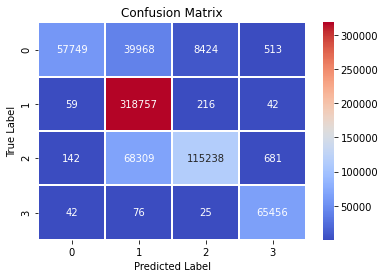

***************************   05.csv   ***************************
              precision    recall  f1-score   support

           0       1.00      0.54      0.70    106654
           1       0.75      1.00      0.85    319074
           2       0.93      0.63      0.75    184370
           3       0.98      1.00      0.99     65599

    accuracy                           0.82    675697
   macro avg       0.91      0.79      0.82    675697
weighted avg       0.86      0.82      0.81    675697



In [21]:
y_pred_test = model_m.predict(x_test)
  # Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)


show_confusion_matrix(y_test, max_y_pred_test)
print("***************************   " + i + "   ***************************" )
print(classification_report(y_test, max_y_pred_test))

In [22]:

model_m.save('saved_model/my_model_3')

INFO:tensorflow:Assets written to: saved_model/my_model_3/assets


In [23]:
! tar -czvf model_3.tar.gz saved_model/my_model_3

saved_model/my_model_3/
saved_model/my_model_3/keras_metadata.pb
saved_model/my_model_3/variables/
saved_model/my_model_3/variables/variables.index
saved_model/my_model_3/variables/variables.data-00000-of-00001
saved_model/my_model_3/saved_model.pb
saved_model/my_model_3/assets/


In [ ]:
#Algorithm 
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, 10), input_shape=(input_shape,)))
model_m.add(Dense(4096, activation='relu'))
model_m.add(Dense(3036, activation='relu'))
model_m.add(Dense(2048, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(4, activation='softmax'))
print(model_m.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 35, 10)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 35, 4096)          45056     
_________________________________________________________________
dense_9 (Dense)              (None, 35, 3036)          12438492  
_________________________________________________________________
dense_10 (Dense)             (None, 35, 2048)          6219776   
_________________________________________________________________
flatten_2 (Flatten)          (None, 71680)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 286724    
Total params: 18,990,048
Trainable params: 18,990,048
Non-trainable params: 0
__________________________________________

KeyboardInterrupt: ignored

In [ ]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True)]

opt = keras.optimizers.SGD(learning_rate= 0.001) 
model_m.compile(loss='categorical_crossentropy',
                optimizer=opt, metrics=['accuracy'])

# Hyper-parameters
EPOCHS = 100

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      epochs=EPOCHS,
                      validation_split=0.4, batch_size = 1280)

Epoch 1/100
 61/177 [=========>....................] - ETA: 2:43 - loss: 1.1829 - accuracy: 0.5913

In [ ]:
# Test datasets

import seaborn as sns
#frames = [pd.read_csv("02.csv"), pd.read_csv("10.csv"), pd.read_csv("11.csv")]
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

test_datasets = ["02.csv","10.csv","11.csv","13.csv","9.csv"]


for i in test_datasets:
  data= pd.read_csv(i)
  data = data.dropna()
  data = data.replace({'Activity': "Reclining"}, 'Sitting')

  data = data.replace({'Activity': "Standing "}, 'Standing')
  data = data.replace({'Activity': "Wlaking"}, 'Walking')
  data = data.loc[data['Activity'].isin(['Lying','Sitting','Standing',"Walking"])]

  print(i)
 
  data["ActivityEncoded"] = le.fit_transform(data['Activity'].values.ravel())
  df_test = data

  x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


  y_pred_test = model_m.predict(x_test)
  # Take the class with the highest probability from the test predictions
  max_y_pred_test = np.argmax(y_pred_test, axis=1)


  show_confusion_matrix(y_test, max_y_pred_test)
  print("***************************   " + i + "        *******************" )
  print(classification_report(y_test, max_y_pred_test))

In [ ]:
df1 = pd.read_csv("DF2.csv")

#df1 = df1.drop(df1[df1.Activity == "Switch"].index)
#df1 = df1.drop(df1[df1.Activity == "switch"].index)
#df1 = df1.replace({'Activity': "Switch"}, 'switch')
#df1 = df1.drop(df1[df1.Activity == "Switch from moving right foot to left foot"].index)
#df1 = df1.drop(df1[df1.Activity == "discard"].index)
#df1 = df1.drop(df1[df1.Activity == "Discard"].index)
df1 = df1.replace({'Activity': "Reclining"}, 'sed')
#df1 = df1.replace({'Activity': "half squats"}, 'half squat')

#df1 = df1.drop(df1[df1.Activity == "leg kick backs"].index)
#df1 = df1.drop(df1[df1.Activity == "half squat"].index)
#df1 = df1.drop(df1[df1.Activity == "calf raises"].index)
#df1 = df1.drop(df1[df1.Activity == "Lying"].index)

df1["Activity"].unique()

array(['Sitting', 'Standing', 'Walking'], dtype=object)

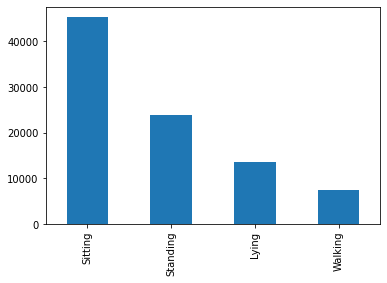

In [ ]:
df1["Activity"].value_counts().plot(kind = 'bar')

In [ ]:
df2 = pd.read_csv("DF3.csv")

df2 = df2.replace({'Activity': "Switch"}, 'switch')
df2 = df2.drop(df2[df2.Activity == "switch"].index)
df2 = df2.drop(df2[df2.Activity == "discard"].index)
df2 = df2.drop(df2[df2.Activity == "Discard"].index)
df2 = df2.replace({'Activity': "Reclining"}, 'Sitting')
df2 = df2.replace({'Activity': "single leg straight leg kick backs"}, 'leg kick backs')
df2 = df2.replace({'Activity': "half squats"}, 'half squat')

df2 = df2.drop(df2[df2.Activity == "leg kick backs"].index)
df2 = df2.drop(df2[df2.Activity == "half squat"].index)
df2 = df2.drop(df2[df2.Activity == "calf raises"].index)
#df2 = df2.drop(df2[df2.Activity == "Lying"].index)
df2["Activity"].unique() 

array(['Sitting', 'Standing', 'Walking', 'Lying', nan], dtype=object)

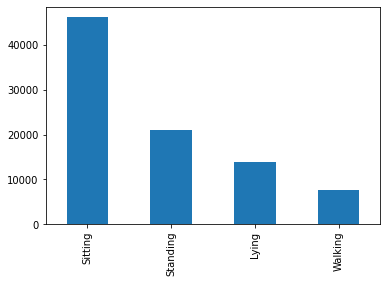

In [ ]:
df2["Activity"].value_counts().plot(kind = 'bar')

In [ ]:
df3 = pd.read_csv("DF4.csv")


df3 = df3.drop(df3[df3.Activity == "discard"].index)
df3 = df3.drop(df3[df3.Activity == "Discard"].index)
#df3 = df3.drop(df3[df3.Activity == "half squats"].index)
#df3 = df3.drop(df3[df3.Activity == "half squat"].index)
#df3 = df3.drop(df3[df3.Activity == "calf raises"].index)
#df3 = df3.drop(df3[df3.Activity == "leg kick backs"].index)
df3 = df3.replace({'Activity': "half squats"}, 'half squat')
df3 = df3.replace({'Activity': "Reclining"}, 'Sitting')
df3 = df3.replace({'Activity': "Switch"}, 'switch')
df3 = df3.drop(df3[df3.Activity == "switch"].index)

df3 = df3.drop(df3[df3.Activity == "leg kick backs"].index)
df3 = df3.drop(df3[df3.Activity == "half squat"].index)
df3 = df3.drop(df3[df3.Activity == "calf raises"].index)
#df3 = df3.drop(df3[df3.Activity == "Lying"].index)

df3["Activity"].unique() 


array(['Sitting', 'Standing', 'Walking', 'Lying'], dtype=object)

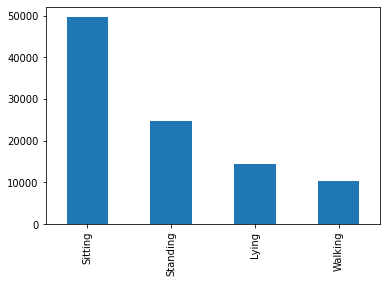

In [ ]:
df3["Activity"].value_counts().plot(kind = 'bar')

In [ ]:
df4 = pd.read_csv("DF5.csv")


df4 = df4.drop(df4[df4.Activity == "Preparation (discard)"].index)
df4 = df4.drop(df4[df4.Activity == "Discard"].index)
df4 = df4.drop(df4[df4.Activity == "discard"].index)
#df4 = df4.drop(df4[df4.Activity == "half squats"].index)
#df4 = df4.drop(df4[df4.Activity == "calf raises"].index)
#df4 = df4.drop(df4[df4.Activity == "leg kick backs"].index)

df4 = df4.replace({'Activity': "Reclining"}, 'Sitting')
df4 = df4.replace({'Activity': "Standing "}, 'Standing')
df4 = df4.replace({'Activity': "half squats"}, 'half squat')
df4 = df4.replace({'Activity': "Switch"}, 'switch')
df4 = df4.drop(df4[df4.Activity == "switch"].index)


df4 = df4.drop(df4[df4.Activity == "leg kick backs"].index)
df4 = df4.drop(df4[df4.Activity == "half squat"].index)
df4 = df4.drop(df4[df4.Activity == "calf raises"].index)
#df4 = df4.drop(df4[df4.Activity == "Lying"].index)

df4["Activity"].unique() 



array(['Sitting', 'Standing', 'Walking', 'Lying'], dtype=object)

In [ ]:
df1["Activity"].unique()

array(['Sitting', 'Standing', 'Walking', 'Lying'], dtype=object)

In [ ]:
df2=df2.dropna()
df2["Activity"].unique()

array(['Sitting', 'Standing', 'Walking', 'Lying'], dtype=object)

In [ ]:
df3["Activity"].unique() 

array(['Sitting', 'Standing', 'Walking', 'Lying'], dtype=object)

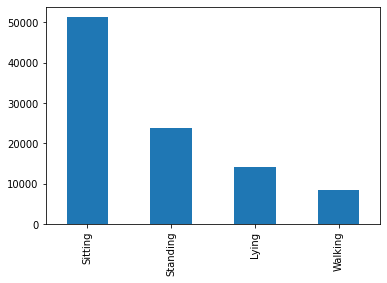

In [ ]:
df4["Activity"].value_counts().plot(kind = 'bar')

In [ ]:
from sklearn.preprocessing import StandardScaler
train = df1.drop(["Activity","Activity"], axis=1)
scaler = StandardScaler()
train_arr = scaler.fit_transform(train)

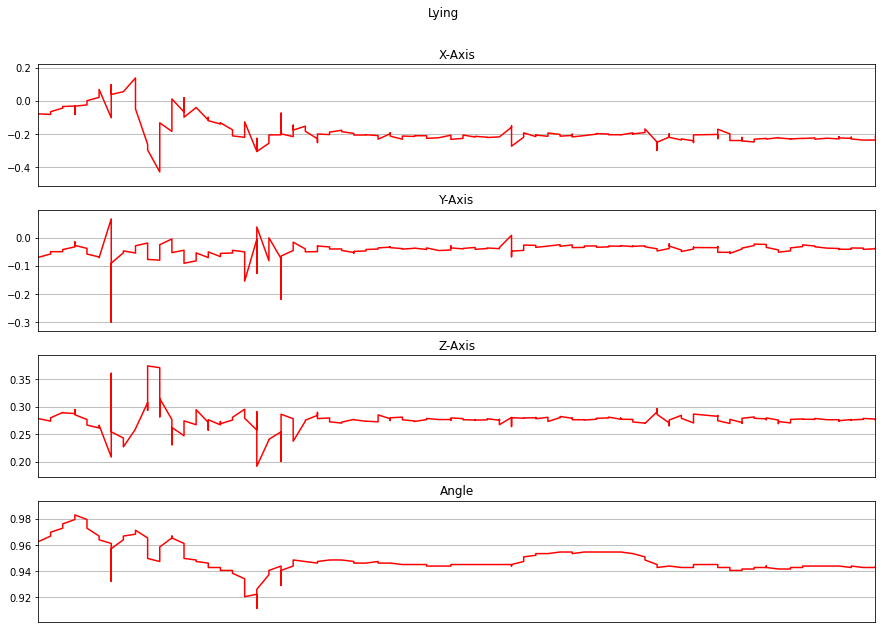

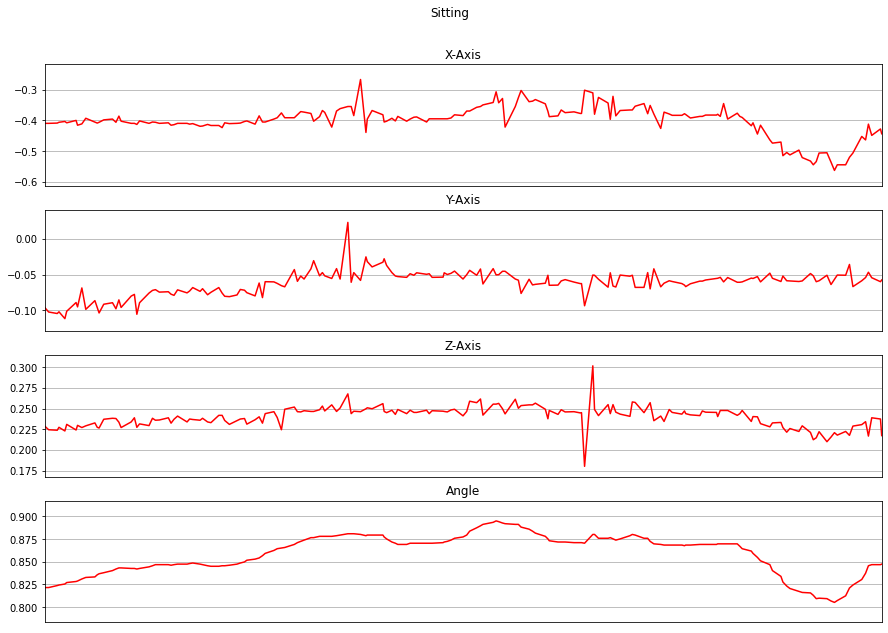

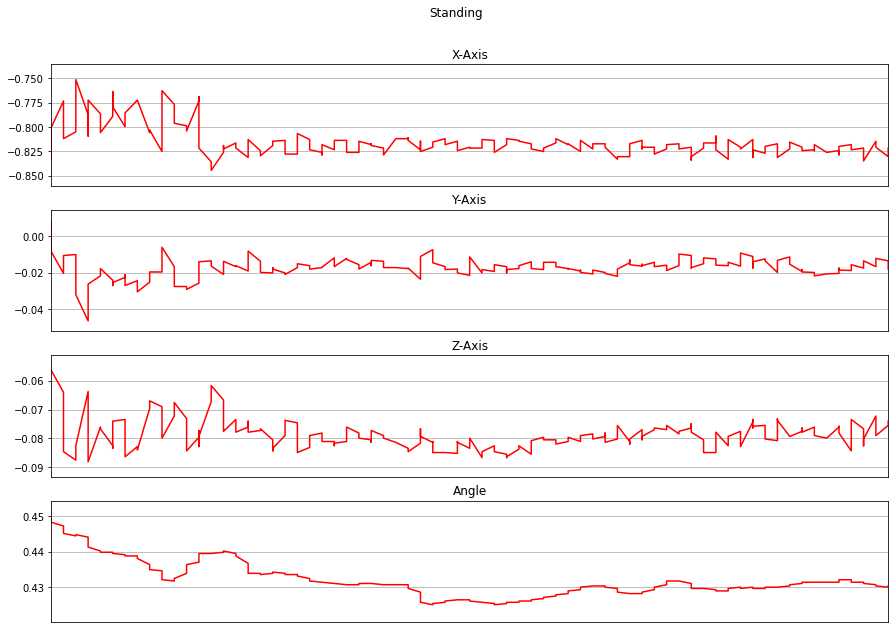

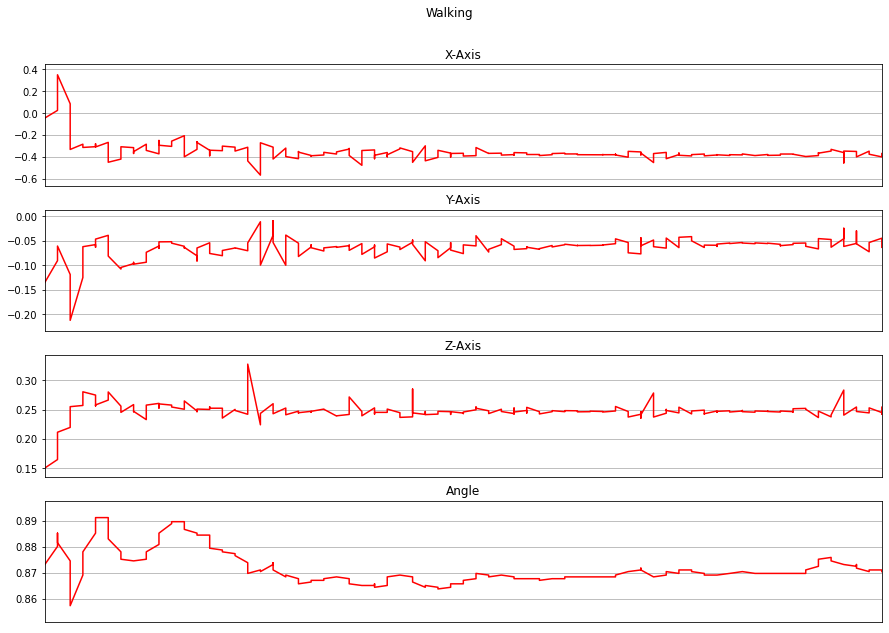

In [ ]:

def plot_activity(activity, data):

    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['Time'], data['X'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['Y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['Z'], 'Z-Axis')
    plot_axis(ax3, data['Time'], data['Angle'], 'Angle')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in np.unique(a['Activity']):
    subset = a[a['Activity'] == activity][:180]
    plot_activity(activity, subset)


In [ ]:
 from sklearn import preprocessing
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df1[LABEL] = le.fit_transform(df1['Activity'].values.ravel())
df2[LABEL] = le.fit_transform(df2['Activity'].values.ravel())
df3[LABEL] = le.fit_transform(df3['Activity'].values.ravel())
df4[LABEL] = le.fit_transform(df4['Activity'].values.ravel())

In [ ]:
  data1= pd.read_csv("11.csv")
  data1 = data1.dropna()
  data1 = data1.replace({'Activity': "Reclining"}, 'Sitting')
  data1 = data1.replace({'Activity': "Wlaking"}, 'Sitting')
  data1 = data1.loc[data1['Activity'].isin(["Lying",'Sitting','Standing',"Walking"])]
  data1["ActivityEncoded"] = le.fit_transform(data1['Activity'].values.ravel())

In [ ]:
  data2= pd.read_csv("02.csv")
  data2 = data2.dropna()
  data2 = data2.replace({'Activity': "Reclining"}, 'Sitting')
  data2 = data2.replace({'Activity': "Wlaking"}, 'Sitting')
  data2 = data2.loc[data2['Activity'].isin(['Lying','Sitting','Standing',"Walking"])]
  data2["ActivityEncoded"] = le.fit_transform(data2['Activity'].values.ravel())

In [ ]:
df1[df1.ActivityEncoded == 0]

,Time,Angle,X,Y,Z,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Activity,ActivityEncoded
71371,2824.0,0.908722,-0.121647,0.013260,0.236529,0.021676,-0.003265,-0.021056,0.387863,-0.022091,0.797508,Lying,0
71372,2824.0,0.908722,-0.127660,0.013812,0.238553,0.012361,-0.006976,-0.016502,0.382564,-0.016086,0.806854,Lying,0
71373,2824.1,0.908722,-0.121647,0.006354,0.241589,0.009159,-0.000223,-0.008251,0.382564,-0.016086,0.781931,Lying,0
71374,2824.1,0.908722,-0.131822,0.003591,0.241589,0.012361,0.002783,-0.000396,0.382564,-0.016086,0.781931,Lying,0
71375,2824.2,0.908722,-0.124884,0.007182,0.236782,0.013606,-0.004638,-0.014851,0.399658,-0.002681,0.792025,Lying,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85515,3351.8,0.430611,-0.104995,-0.251657,-0.056413,-0.000422,-0.001150,-0.001650,0.456239,-0.819088,-0.211838,Lying,0
85516,3351.8,0.430611,-0.104070,-0.250829,-0.055148,-0.000422,-0.000223,0.000000,0.436923,-0.823056,-0.211838,Lying,0
85517,3351.8,0.430611,-0.105920,-0.252210,-0.054642,0.000133,0.000000,0.000000,0.436923,-0.819088,-0.216573,Lying,0
85518,3351.9,0.430611,-0.104995,-0.251934,-0.055401,0.000422,-0.000445,0.000792,0.448718,-0.823056,-0.201745,Lying,0


In [ ]:


df1 = Trans(df1)
df2 = Trans(df2)
df3 = Trans(df3)
df4 = Trans(data1)
df5 = Trans(data2)


In [ ]:
df4 = df4.drop("Unnamed: 12",axis = 1)

KeyError: ignored

In [ ]:
df4

,Time,Angle,X,Y,Z,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Activity,ActivityEncoded
933,34.257,0.821576,-0.409449,-0.096225,0.228841,0.029685,-0.005525,0.001826,-0.687236,-0.401269,0.654770,Sitting,1
934,34.289,0.821576,-0.409449,-0.102605,0.224418,0.010624,-0.003052,0.005889,-0.698492,-0.396586,0.654770,Sitting,1
935,34.359,0.823782,-0.408574,-0.104732,0.223828,-0.000685,-0.003419,0.006596,-0.698492,-0.396586,0.649749,Sitting,1
936,34.373,0.824363,-0.405949,-0.102339,0.227367,0.005941,-0.012576,-0.001119,-0.693467,-0.392809,0.649749,Sitting,1
937,34.421,0.825466,-0.403325,-0.111909,0.222943,0.010624,-0.009737,-0.003651,-0.687236,-0.401269,0.649749,Sitting,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131363,4927.500,0.662428,-2.797025,-0.416534,-0.018284,-0.627697,-0.429217,0.214239,-1.187136,-0.327693,-0.172208,Walking,3
131364,4927.500,0.669512,0.625547,0.182881,-0.148334,0.611264,0.453452,-0.186620,-1.165829,-0.358816,-0.047496,Walking,3
131365,4927.600,0.608373,-0.948381,0.374003,-0.132409,0.083092,0.168061,0.167835,-1.165829,-0.358816,-0.047496,Walking,3
131366,4927.600,0.609069,-0.826772,0.022594,-0.099381,-0.163313,0.337464,-0.043814,-1.170854,-0.371053,-0.095807,Walking,3


In [ ]:
model = Sequential()
model.add(LSTM(1000, input_shape=(80,10)))
model.add(Dense(15000, activation='relu'))
model.add(Dense(10000, activation='relu'))
model.add(Dense(8000, activation='relu'))
model.add(Dense(6000, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3036, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

opt = keras.optimizers.SGD(learning_rate= 0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit network
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1000)              4044000   
_________________________________________________________________
dense_28 (Dense)             (None, 15000)             15015000  
_________________________________________________________________
dense_29 (Dense)             (None, 10000)             150010000 
_________________________________________________________________
dense_30 (Dense)             (None, 8000)              80008000  
_________________________________________________________________
dense_31 (Dense)             (None, 6000)              48006000  
_________________________________________________________________
dense_32 (Dense)             (None, 4096)              24580096  
_________________________________________________________________
dense_33 (Dense)             (None, 3036)             

In [ ]:
model.fit(x_train, y_train_hot, epochs=100, batch_size=128,validation_split=0.3)

Epoch 1/100
70/70 [==============================] - 29s 182ms/step - loss: 1.3859 - accuracy: 0.3334 - val_loss: 1.3851 - val_accuracy: 0.3961
Epoch 2/100
70/70 [==============================] - 12s 170ms/step - loss: 1.3835 - accuracy: 0.5073 - val_loss: 1.3839 - val_accuracy: 0.3961
Epoch 3/100
56/70 [=======================>......] - ETA: 2s - loss: 1.3814 - accuracy: 0.5023

KeyboardInterrupt: ignored

x_train shape:  (26441, 40, 10)
26441 training samples
y_train shape:  (26441,)


In [ ]:
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

# Set input & output dimensions
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)


x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

['Lying', 'Sitting', 'Standing', 'Walking']


In [ ]:
input_shape = (num_time_periods*num_sensors)
x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

x_train shape: (26441, 400)
input_shape: 400


In [ ]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [ ]:
y_train_hot = np_utils.to_categorical(y_train, 4)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (26441, 4)


In [ ]:
y_train

array([0., 0., 0., ..., 3., 3., 3.], dtype=float32)

In [ ]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
model_m.add(Reshape((TIME_PERIODS, 10), input_shape=(40,10,)))
model_m.add(Dense(4096, activation='relu'))
model_m.add(Dense(3036, activation='relu'))
model_m.add(Dense(2048, activation='relu'))
model_m.add(Dense(1024, activation='relu'))
model_m.add(Dense(512, activation='relu'))
model_m.add(Dense(256, activation='relu'))
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(64, activation='relu'))
model_m.add(Dense(32, activation='relu'))
model_m.add(Flatten())
model_m.add(Dense(4, activation='softmax'))
print(model_m.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 40, 10)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 40, 4096)          45056     
_________________________________________________________________
dense_11 (Dense)             (None, 40, 3036)          12438492  
_________________________________________________________________
dense_12 (Dense)             (None, 40, 2048)          6219776   
_________________________________________________________________
dense_13 (Dense)             (None, 40, 1024)          2098176   
_________________________________________________________________
dense_14 (Dense)             (None, 40, 512)           524800    
_________________________________________________________________
dense_15 (Dense)             (None, 40, 256)          

In [ ]:
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (26441, 4)


In [ ]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True)]

opt = keras.optimizers.SGD(learning_rate= 0.001) 
model_m.compile(loss='categorical_crossentropy',
                optimizer=opt, metrics=['accuracy'])

# Hyper-parameters
EPOCHS = 100

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model_m.fit(x_train,
                      y_train_hot,
                      epochs=EPOCHS,
                      validation_split=0.4)

Epoch 1/100
496/496 [==============================] - 31s 60ms/step - loss: 1.3069 - accuracy: 0.4324 - val_loss: 1.3710 - val_accuracy: 0.4692
Epoch 2/100
496/496 [==============================] - 29s 58ms/step - loss: 1.0881 - accuracy: 0.4486 - val_loss: 1.5027 - val_accuracy: 0.4692
Epoch 3/100
496/496 [==============================] - 28s 57ms/step - loss: 1.0415 - accuracy: 0.4404 - val_loss: 1.5669 - val_accuracy: 0.4692
Epoch 4/100
496/496 [==============================] - 29s 58ms/step - loss: 1.0042 - accuracy: 0.4429 - val_loss: 1.5925 - val_accuracy: 0.4692
Epoch 5/100
496/496 [==============================] - 29s 58ms/step - loss: 0.9510 - accuracy: 0.5297 - val_loss: 1.5960 - val_accuracy: 0.4692
Epoch 6/100
496/496 [==============================] - 29s 58ms/step - loss: 0.8484 - accuracy: 0.7324 - val_loss: 1.6153 - val_accuracy: 0.6637
Epoch 7/100
496/496 [==============================] - 29s 58ms/step - loss: 0.7078 - accuracy: 0.8455 - val_loss: 1.6664 - val_ac

In [ ]:


import seaborn as sns


In [ ]:
# Test datasets

import seaborn as sns
#frames = [pd.read_csv("02.csv"), pd.read_csv("10.csv"), pd.read_csv("11.csv")]
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

test_datasets = ["02.csv","10.csv","11.csv","13.csv","9.csv"]


for i in test_datasets:
  data= pd.read_csv(i)
  data = data.dropna()
  print(i)
  data = data.loc[data['Activity'].isin(['Sitting','Lying','Standing',"Walking"])]
  data["ActivityEncoded"] = le.fit_transform(data['Activity'].values.ravel())
  df_test = data

  x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)


  y_pred_test = model.predict(x_test)
  # Take the class with the highest probability from the test predictions
  max_y_pred_test = np.argmax(y_pred_test, axis=1)


  show_confusion_matrix(y_test, max_y_pred_test)
  print("***************************   " + i + "        *******************" )
  print(classification_report(y_test, max_y_pred_test))

In [ ]:
y_pred_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
data = data.loc[data['Activity'].isin(['Sitting','Lying','Standing',"Walking"])]

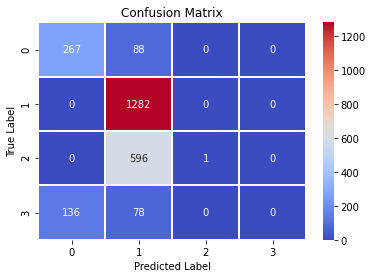

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       355
           1       0.63      1.00      0.77      1282
           2       1.00      0.00      0.00       597
           3       0.00      0.00      0.00       214

    accuracy                           0.63      2448
   macro avg       0.57      0.44      0.37      2448
weighted avg       0.67      0.63      0.51      2448



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_test = df4

x_test, y_test = create_segments_and_labels(df_test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)



import seaborn as sns
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)


show_confusion_matrix(y_test, max_y_pred_test)

print(classification_report(y_test, max_y_pred_test))

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
b = pd.read_csv("SORD combined-21.csv")
b = b.drop(["Unnamed: 12","Unnamed: 13", "Unnamed: 14"], axis = 1)
b["Activity"][13852] = "Switch"
b = b.drop(b[b.Activity == "Switch"].index)

In [ ]:
b.Activity.unique()

array(['Sitting', 'Reclining', 'Standing', 'Walking', 'Lying'],
      dtype=object)

In [ ]:
# Define column name of the label vector
LABEL = 'ActivityEncoded'

# Add a new column to the existing DataFrame with the encoded values
b[LABEL] = le.fit_transform(b['Activity'].values.ravel())
df_test = b

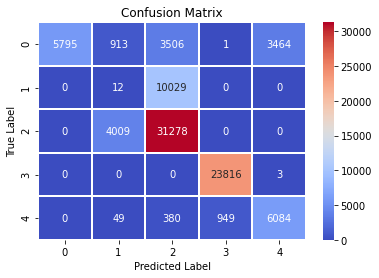

              precision    recall  f1-score   support

           0       1.00      0.42      0.60     13679
           1       0.00      0.00      0.00     10041
           2       0.69      0.89      0.78     35287
           3       0.96      1.00      0.98     23819
           4       0.64      0.82      0.72      7462

    accuracy                           0.74     90288
   macro avg       0.66      0.63      0.61     90288
weighted avg       0.73      0.74      0.71     90288



In [ ]:
y_pred_test

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.9755506e-34, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.0638620e-38, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
pd.unique(b["Activity"])

array(['Sitting', 'Reclining', 'Standing', 'Walking', 'Lying'],
      dtype=object)

In [ ]:
train, test = train_test_split(a, test_size=0.33, random_state=42)

In [ ]:
a = pd.read_csv("SORD combined1.csv")


a["Activity"][15924] = "Switch"
a = a.drop(["Unnamed: 12"], axis = 1)
a = a.drop(a[a.Activity == "Switch"].index)

from sklearn import preprocessing
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
a[LABEL] = le.fit_transform(a['Activity'].values.ravel())

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=100000,min_samples_leaf=100, random_state=42)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:

y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(Y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(Y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(Y_train, y_pred_train))


Accuracy: 0.95
Confusion Matrix: 
 [[24308    72     0     0     0    73]
 [  357  2646   553   715   167    96]
 [    0   271 13817    36     0     0]
 [    0   306    77  4630    29     0]
 [   21    69     0     5  9158     1]
 [  178    21     0     0     0  6314]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99     24453
           2       0.78      0.58      0.67      4534
           3       0.96      0.98      0.97     14124
           4       0.86      0.92      0.89      5042
           5       0.98      0.99      0.98      9254
           6       0.97      0.97      0.97      6513

    accuracy                           0.95     63920
   macro avg       0.92      0.91      0.91     63920
weighted avg       0.95      0.95      0.95     63920



In [ ]:
y_pred=classifier.predict(test_X)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(test_Y, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(test_Y,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(test_Y, y_pred))

Accuracy: 0.95
Confusion Matrix: 
 [[11884    44     0     0     0    38]
 [  196  1269   297   338   104    37]
 [    0   126  6822    24     0     0]
 [    0   175    41  2260    12     0]
 [   11    32     0     7  4505     1]
 [   81    12     0     0     0  3167]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.98     11966
           2       0.77      0.57      0.65      2241
           3       0.95      0.98      0.97      6972
           4       0.86      0.91      0.88      2488
           5       0.97      0.99      0.98      4556
           6       0.98      0.97      0.97      3260

    accuracy                           0.95     31483
   macro avg       0.92      0.90      0.91     31483
weighted avg       0.95      0.95      0.95     31483



In [ ]:
from sklearn.tree import export_text
r = export_text(classifier)

In [ ]:
print(r)

|--- feature_0 <= 141.55
|   |--- feature_1 <= -3.62
|   |   |--- feature_0 <= 79.80
|   |   |   |--- feature_0 <= 77.72
|   |   |   |   |--- feature_0 <= 68.79
|   |   |   |   |   |--- feature_1 <= -6.06
|   |   |   |   |   |   |--- feature_0 <= 31.40
|   |   |   |   |   |   |   |--- feature_2 <= 2.26
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_2 >  2.26
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_0 >  31.40
|   |   |   |   |   |   |   |--- feature_0 <= 38.55
|   |   |   |   |   |   |   |   |--- feature_3 <= 2.37
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 2.30
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |--- feature_2 >  2.30
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- feature_3 >  2.37
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_0 >  38.55
|   |   |   |  

In [ ]:
test_X2 = b.drop(["Activity"], axis = 1)
scaler = MinMaxScaler(feature_range=(0, 1))
#test_X = scaler.fit_transform(test_X2)
test_Y2 = b["Activity"].astype('category')

In [ ]:
test_X2

,Angle,X,Y,Z
0,162.77,-2.57,-0.41,8.94
1,162.57,-2.98,0.45,9.37
2,162.57,-3.09,0.84,9.65
3,162.38,-2.65,-0.41,9.06
4,162.18,-2.76,-0.49,9.36
...,...,...,...,...
97714,119.39,1.47,1.56,-6.71
97715,118.53,6.90,-6.52,-10.33
97716,113.39,-0.64,-3.86,-2.51
97717,109.49,-28.06,3.20,12.52


In [ ]:
y_pred=classifier.predict(test_X2)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(test_Y2, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(test_Y2,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(test_Y2, y_pred))

Accuracy: 0.39
Confusion Matrix: 
 [[12239 11098     0     0   302 11650]
 [  396  2044   110  4248   335   293]
 [    0 18448  2891  2480     0     0]
 [    0  1408    43  5882   132     0]
 [   27    90     0    55 10068  3439]
 [ 4561   332     0     0     2  5146]]
              precision    recall  f1-score   support

           1       0.71      0.35      0.47     35289
           2       0.06      0.28      0.10      7426
           3       0.95      0.12      0.22     23819
           4       0.46      0.79      0.58      7465
           5       0.93      0.74      0.82     13679
           6       0.25      0.51      0.34     10041

    accuracy                           0.39     97719
   macro avg       0.56      0.46      0.42     97719
weighted avg       0.68      0.39      0.42     97719



In [ ]:
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
clf = OutputCodeClassifier(LinearSVC(random_state=0,max_iter=100000),
  
                         code_size=2, random_state=0)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OutputCodeClassifier(code_size=2,
                     estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                         fit_intercept=True,
                                         intercept_scaling=1,
                                         loss='squared_hinge', max_iter=100000,
                                         multi_class='ovr', penalty='l2',
                                         random_state=0, tol=0.0001,
                                         verbose=0),
                     n_jobs=None, random_state=0)

In [ ]:
y_pred=clf.predict(test_X)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(test_Y, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(test_Y,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(test_Y, y_pred))

Accuracy: 0.73
Confusion Matrix: 
 [[10890     1     3     0     0  1072]
 [  263     4  1518    87   278    91]
 [    0     0  6972     0     0     0]
 [    0     6  1336   814   325     7]
 [ 1255     0     0     0  3301     0]
 [ 2133     0     1     0     0  1126]]
              precision    recall  f1-score   support

           1       0.75      0.91      0.82     11966
           2       0.36      0.00      0.00      2241
           3       0.71      1.00      0.83      6972
           4       0.90      0.33      0.48      2488
           5       0.85      0.72      0.78      4556
           6       0.49      0.35      0.41      3260

    accuracy                           0.73     31483
   macro avg       0.68      0.55      0.55     31483
weighted avg       0.71      0.73      0.69     31483



In [ ]:
y_pred=clf.predict(test_X2)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(test_Y2, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(test_Y2,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(test_Y2, y_pred))

Accuracy: 0.70
Confusion Matrix: 
 [[33587   354   544   801     0     3]
 [  841    25  5742   113   452   253]
 [    0     0 23818     0     1     0]
 [   11     5  6195   640   594    20]
 [ 3465     0     2     0 10212     0]
 [10038     0     1     0     0     2]]
              precision    recall  f1-score   support

           1       0.70      0.95      0.81     35289
           2       0.07      0.00      0.01      7426
           3       0.66      1.00      0.79     23819
           4       0.41      0.09      0.14      7465
           5       0.91      0.75      0.82     13679
           6       0.01      0.00      0.00     10041

    accuracy                           0.70     97719
   macro avg       0.46      0.46      0.43     97719
weighted avg       0.58      0.70      0.61     97719



In [ ]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

jj = OneVsOneClassifier(LinearSVC(random_state=0))
jj.fit(X_train, Y_train)
y_pred=jj.predict(test_X)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(test_Y, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(test_Y,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(test_Y, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Accuracy: 0.60
Confusion Matrix: 
 [[11936     0     0     0    15    15]
 [  293    36     4  1662   206    40]
 [    0     0     1  6971     0     0]
 [    2    13    29  2322   118     4]
 [    8     1     0  1158  3386     3]
 [ 2148     0     1     0     3  1108]]
              precision    recall  f1-score   support

           1       0.83      1.00      0.91     11966
           2       0.72      0.02      0.03      2241
           3       0.03      0.00      0.00      6972
           4       0.19      0.93      0.32      2488
           5       0.91      0.74      0.82      4556
           6       0.95      0.34      0.50      3260

    accuracy                           0.60     31483
   macro avg       0.60      0.51      0.43     31483
weighted avg       0.62      0.60      0.54     31483



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
y_pred=jj.predict(test_X2)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(test_Y2, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(test_Y2,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(test_Y2, y_pred))

Accuracy: 0.28
Confusion Matrix: 
 [[12015     0    51     0  2383 20840]
 [  638   122   107  5742   417   400]
 [    0     0     0 23819     0     0]
 [   11    36   816  5343  1225    34]
 [   38  3338     0  3464  3418  3421]
 [ 3278     0     0     0    23  6740]]
              precision    recall  f1-score   support

           1       0.75      0.34      0.47     35289
           2       0.03      0.02      0.02      7426
           3       0.00      0.00      0.00     23819
           4       0.14      0.72      0.23      7465
           5       0.46      0.25      0.32     13679
           6       0.21      0.67      0.33     10041

    accuracy                           0.28     97719
   macro avg       0.27      0.33      0.23     97719
weighted avg       0.37      0.28      0.27     97719



In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot

In [ ]:
# cnn lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from matplotlib import pyplot

In [ ]:
X2 = b.drop(["Activity"], axis = 1).values
Y2 = b["Activity"]

X2 = X2.reshape((1, X2.shape[0], 4))


In [ ]:
test_X2.shape

(97719, 4)

In [ ]:
Y2 = to_categorical(Y2)


In [ ]:
Y2.shape()

In [ ]:

model = Sequential()
model.add(LSTM(32, input_shape=(test_X2.shape[1], 4)))
model.add(Dense(7))

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X2, Y2, epochs=100, batch_size=32)

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('SORD combined-21.csv', header=0, index_col=0)
dataset = dataset.drop(["Unnamed: 12","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 13", "Unnamed: 14"], axis = 1)
values = dataset.values
values

array([[162.77, -2.57, -0.41, 8.94, 'Sitting'],
       [162.57, -2.98, 0.45, 9.37, 'Sitting'],
       [162.57, -3.09, 0.84, 9.65, 'Sitting'],
       ...,
       [113.39, -0.64, -3.86, -2.51, 'Walking'],
       [109.49, -28.06, 3.2, 12.52, 'Walking'],
       [107.03, -3.06, -3.5, 2.43, 'Walking']], dtype=object)

In [ ]:
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 4, 1)
# drop columns we don't want to predict
print(reframed.head())


   var1(t-4)  var2(t-4)  var3(t-4)  ...   var3(t)   var4(t)   var5(t)
4   0.897514   0.592001   0.451648  ...  0.450549  0.495654  0.333333
5   0.896324   0.585389   0.463462  ...  0.457692  0.496490  0.333333
6   0.896324   0.583616   0.468819  ...  0.462500  0.490806  0.333333
7   0.895194   0.590711   0.451648  ...  0.462088  0.494316  0.333333
8   0.894004   0.588937   0.450549  ...  0.456319  0.494483  0.333333

[5 rows x 25 columns]


In [ ]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.897514,0.592001,0.451648,0.488633,0.333333,0.896324,0.585389,0.463462,0.495821,0.333333
2,0.896324,0.585389,0.463462,0.495821,0.333333,0.896324,0.583616,0.468819,0.500502,0.333333
3,0.896324,0.583616,0.468819,0.500502,0.333333,0.895194,0.590711,0.451648,0.490639,0.333333
4,0.895194,0.590711,0.451648,0.490639,0.333333,0.894004,0.588937,0.450549,0.495654,0.333333
5,0.894004,0.588937,0.450549,0.495654,0.333333,0.892874,0.576197,0.457692,0.496490,0.333333
...,...,...,...,...,...,...,...,...,...,...
97714,0.625327,0.612482,0.518407,0.269809,1.000000,0.639484,0.657152,0.478709,0.227014,1.000000
97715,0.639484,0.657152,0.478709,0.227014,1.000000,0.634368,0.744719,0.367720,0.166500,1.000000
97716,0.634368,0.744719,0.367720,0.166500,1.000000,0.603795,0.623125,0.404258,0.297225,1.000000
97717,0.603795,0.623125,0.404258,0.297225,1.000000,0.580597,0.180939,0.501236,0.548479,1.000000
